<a href="https://colab.research.google.com/github/samrat1699/Deep-Learning-Projects/blob/main/CNN_Assignments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import pathlib

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos.tar', origin=dataset_url, extract=True)
data_dir = pathlib.Path(data_dir).with_suffix('')

228813984/228813984 [==============================] - 2s 0us/step


In [3]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


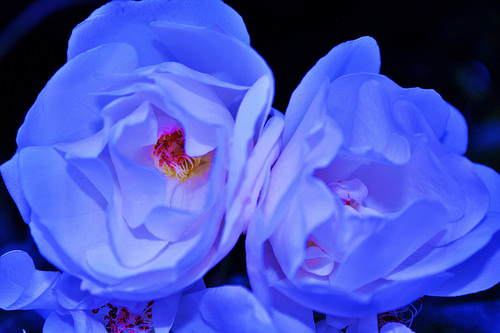

In [4]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[1]))

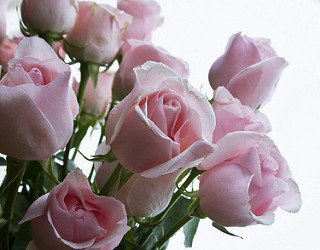

In [5]:
PIL.Image.open(str(roses[2]))

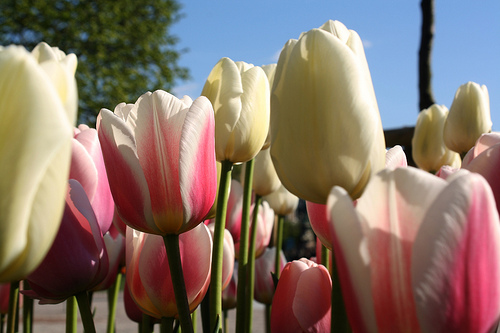

In [6]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

## **Create a dataset**

In [7]:
batch_size = 32
img_height = 180
img_width = 180

In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [9]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [10]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


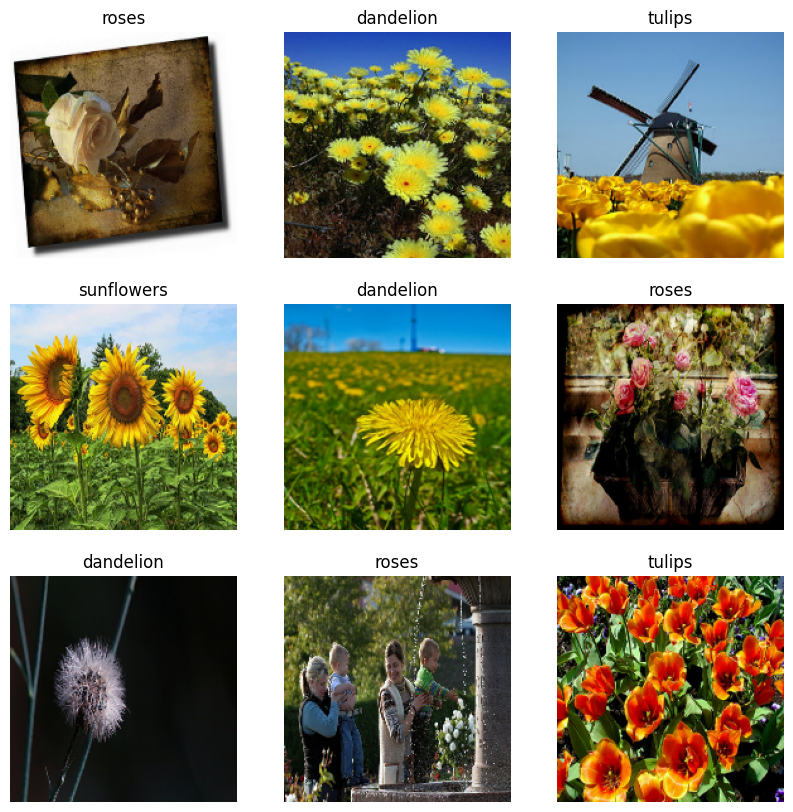

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
# Save the figure
plt.savefig("image_grid.png", bbox_inches='tight', pad_inches=0)

# Show the plot
plt.show()

In [12]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


## **Configure the dataset for performance**

In [13]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## **Standardize the data**

In [15]:
normalization_layer = layers.Rescaling(1./255)

In [16]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.038006518 0.99523425


## **Keras model**

In [17]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

## **Compile the model**

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## **Model summary**

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

## **Train the model**

In [20]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 9s 43ms/step - loss: 1.4341 - accuracy: 0.3764 - val_loss: 1.1158 - val_accuracy: 0.5381
Epoch 2/10
92/92 [==============================] - 2s 19ms/step - loss: 1.0386 - accuracy: 0.5845 - val_loss: 0.9671 - val_accuracy: 0.6049
Epoch 3/10
92/92 [==============================] - 2s 20ms/step - loss: 0.8670 - accuracy: 0.6655 - val_loss: 0.8884 - val_accuracy: 0.6512
Epoch 4/10
92/92 [==============================] - 2s 22ms/step - loss: 0.6689 - accuracy: 0.7432 - val_loss: 0.8206 - val_accuracy: 0.6771
Epoch 5/10
92/92 [==============================] - 2s 20ms/step - loss: 0.4427 - accuracy: 0.8416 - val_loss: 0.9145 - val_accuracy: 0.6567
Epoch 6/10
92/92 [==============================] - 2s 19ms/step - loss: 0.2482 - accuracy: 0.9196 - val_loss: 1.0677 - val_accuracy: 0.6540
Epoch 7/10
92/92 [==============================] - 2s 19ms/step - loss: 0.1337 - accuracy: 0.9649 - val_loss: 1.2265 - val_accuracy: 0.6676
Epoch 8/10
92

## **Visualize training results**

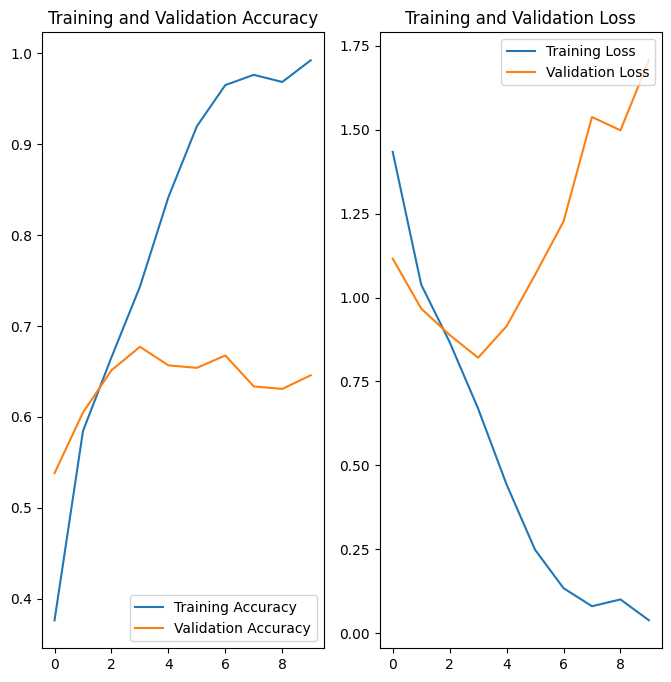

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# Save the figure
plt.savefig("image_validation.png", bbox_inches='tight', pad_inches=0)
plt.show()

## **Data augmentation**

In [22]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

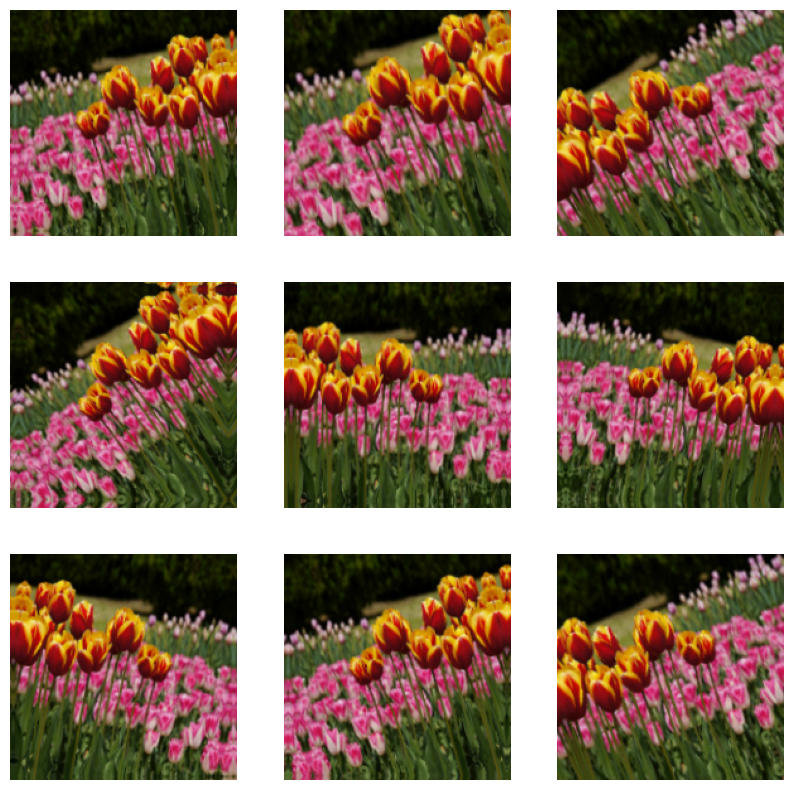

In [23]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")
plt.savefig("image_aug.png", bbox_inches='tight', pad_inches=0)
plt.show()

### **reduce overfitting is to introduce dropout regularization to the network**

In [24]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

### **Compile and train the model**

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

In [27]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 5s 30ms/step - loss: 1.4139 - accuracy: 0.3961 - val_loss: 1.1222 - val_accuracy: 0.5504
Epoch 2/15
92/92 [==============================] - 3s 31ms/step - loss: 1.0652 - accuracy: 0.5831 - val_loss: 1.0427 - val_accuracy: 0.5886
Epoch 3/15
92/92 [==============================] - 3s 29ms/step - loss: 0.9717 - accuracy: 0.6277 - val_loss: 0.9626 - val_accuracy: 0.6335
Epoch 4/15
92/92 [==============================] - 3s 27ms/step - loss: 0.8979 - accuracy: 0.6522 - val_loss: 0.8483 - val_accuracy: 0.6730
Epoch 5/15
92/92 [==============================] - 3s 27ms/step - loss: 0.8395 - accuracy: 0.6676 - val_loss: 0.7934 - val_accuracy: 0.6853
Epoch 6/15
92/92 [==============================] - 3s 28ms/step - loss: 0.7852 - accuracy: 0.6986 - val_loss: 0.7861 - val_accuracy: 0.6935
Epoch 7/15
92/92 [==============================] - 3s 32ms/step - loss: 0.7485 - accuracy: 0.7122 - val_loss: 0.7584 - val_accuracy: 0.7084
Epoch 8/15
92

### **Visualize training results**

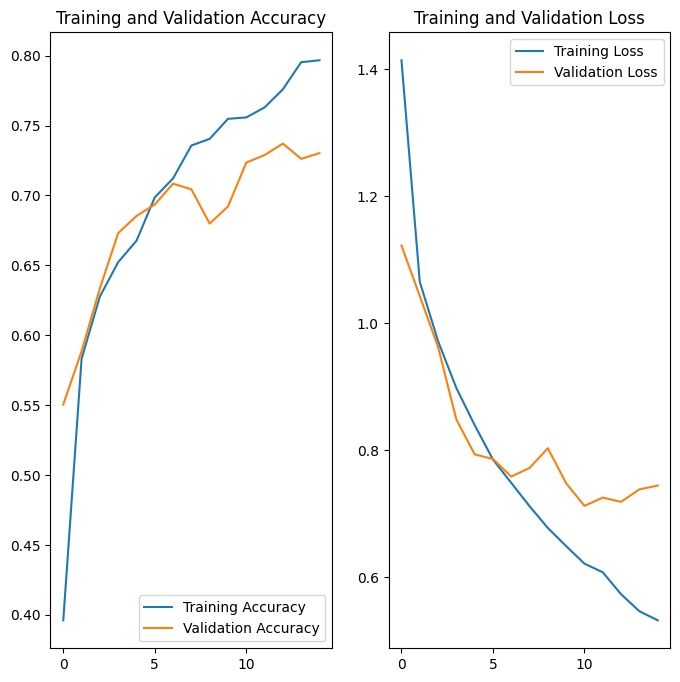

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("image_afterAug_val.png", bbox_inches='tight', pad_inches=0)
plt.show()

### **Predict on new data**

1/1 [==============================] - 0s 301ms/step
This image most likely belongs to sunflowers with a 99.95 percent confidence.


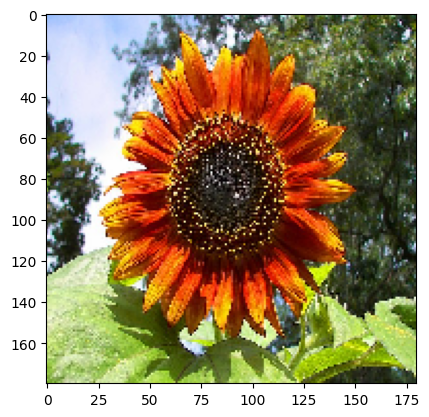

In [29]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"

sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
plt.imshow(img)
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

## **Here you provide any path**

1/1 [==============================] - 0s 29ms/step
This image most likely belongs to daisy with a 100.00 percent confidence.


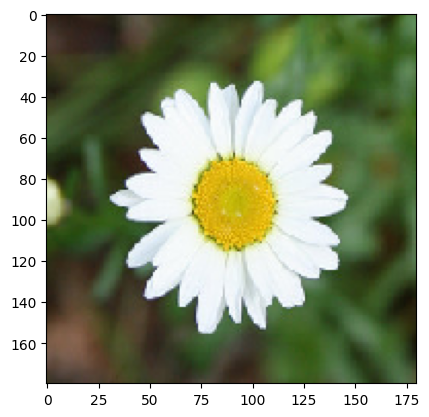

In [30]:
img_path = '/content/525780443_bba812c26a_m.jpg'

img = tf.keras.utils.load_img(
    img_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

plt.imshow(img)
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 17ms/step
This image most likely belongs to daisy with a 100.00% confidence.


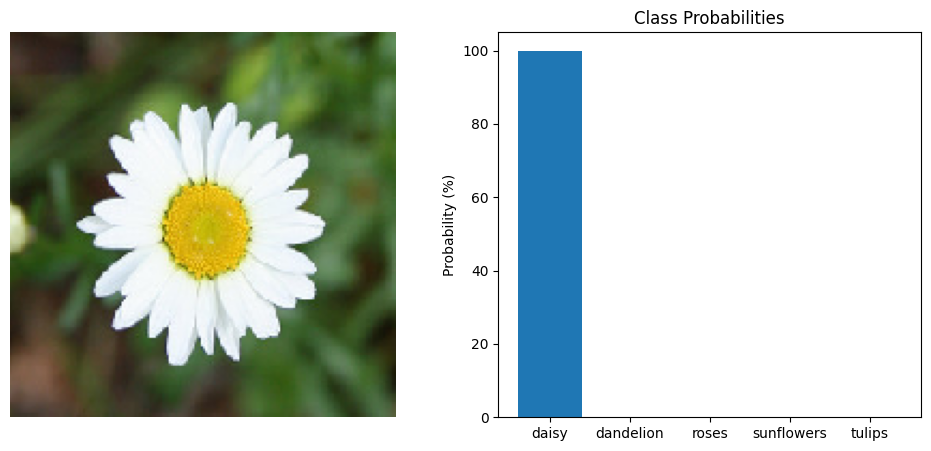

In [31]:
img_path = '/content/525780443_bba812c26a_m.jpg'

# Load and preprocess the image
img = tf.keras.utils.load_img(img_path, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch

# Make predictions
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the image on the first subplot
ax1.imshow(img)
ax1.axis('off')

# Display the prediction probabilities as percentages in a bar chart on the second subplot
ax2.bar(class_names, 100 * score.numpy())
ax2.set_ylabel('Probability (%)')
ax2.set_title('Class Probabilities')

# Print the predicted class and confidence
predicted_class = class_names[np.argmax(score)]
confidence = 100 * np.max(score)
print(f"This image most likely belongs to {predicted_class} with a {confidence:.2f}% confidence.")

plt.show()


1/1 [==============================] - 0s 23ms/step
This image most likely belongs to daisy with a 100.00% confidence.


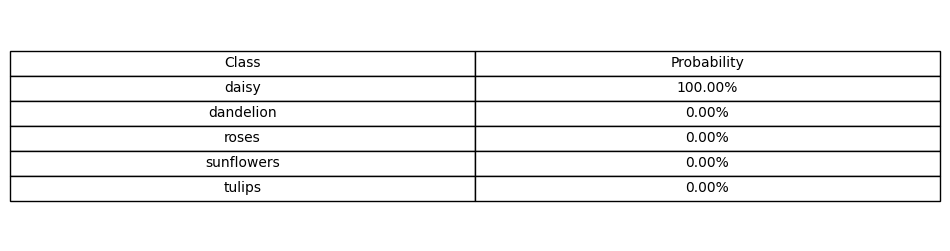

In [32]:
img_path = '/content/525780443_bba812c26a_m.jpg'

# Load and preprocess the image
img = tf.keras.utils.load_img(img_path, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch

# Make predictions
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

# Print the predicted class and confidence
predicted_class = class_names[np.argmax(score)]
confidence = 100 * np.max(score)
print(f"This image most likely belongs to {predicted_class} with a {confidence:.2f}% confidence.")

# Create a table showing class names and prediction probabilities
fig, ax = plt.subplots(figsize=(8, 3))
table_data = [(class_name, f'{prob:.2%}') for class_name, prob in zip(class_names, score)]
table = ax.table(cellText=table_data, colLabels=['Class', 'Probability'], cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.5, 1.5)  # Adjust the table size

# Hide axes
ax.axis('off')

plt.show()


1/1 [==============================] - 0s 18ms/step
This image most likely belongs to tulips with a 46.73% confidence.


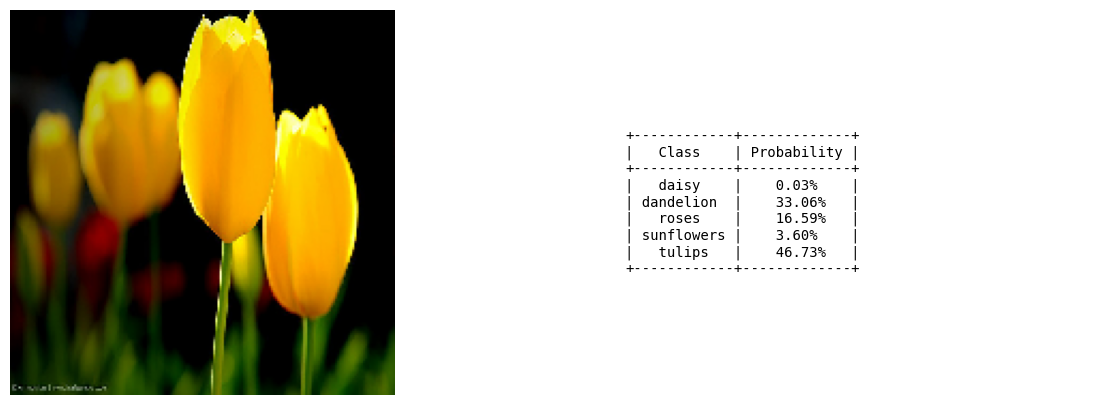

In [38]:
import matplotlib.pyplot as plt
from prettytable import PrettyTable

img_path = '/content/489506904_9b68ba211c.jpg'

# Load and preprocess the image
img = tf.keras.utils.load_img(img_path, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch

# Make predictions
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

# Print the predicted class and confidence
predicted_class = class_names[np.argmax(score)]
confidence = 100 * np.max(score)
print(f"This image most likely belongs to {predicted_class} with a {confidence:.2f}% confidence.")

# Create a PrettyTable for displaying class names and prediction probabilities
table = PrettyTable()
table.field_names = ["Class", "Probability"]
for class_name, prob in zip(class_names, score):
    table.add_row([class_name, f"{prob*100:.2f}%"])

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot the image on the first subplot
ax1.imshow(img)
ax1.axis('off')

# Display the PrettyTable on the second subplot
ax2.text(0.1, 0.5, str(table), fontsize=10, va='center', ha='left', fontfamily='monospace')

# Hide axes
ax2.axis('off')

plt.show()


1/1 [==============================] - 0s 19ms/step
This image most likely belongs to daisy with a 100.00% confidence.


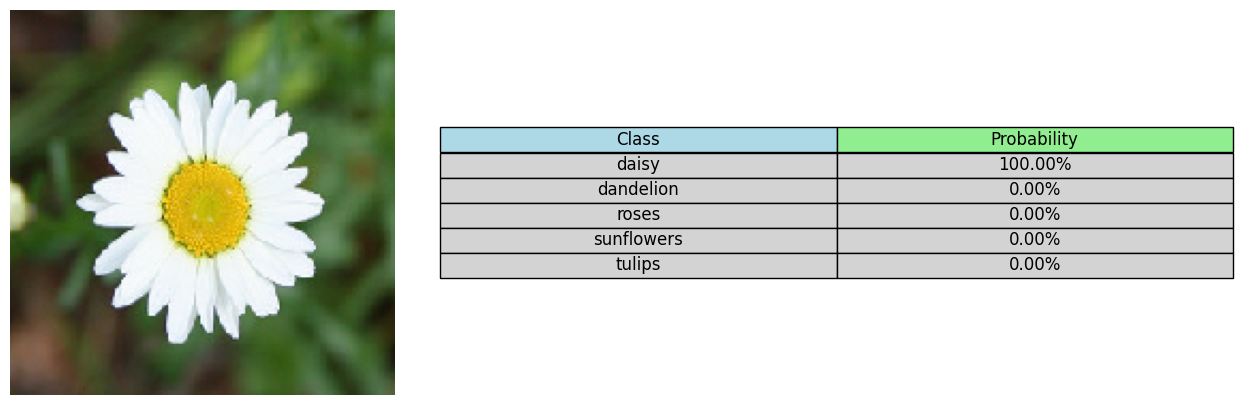

In [34]:
img_path = '/content/525780443_bba812c26a_m.jpg'

# Load and preprocess the image
img = tf.keras.utils.load_img(img_path, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch

# Make predictions
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

# Print the predicted class and confidence
predicted_class = class_names[np.argmax(score)]
confidence = 100 * np.max(score)
print(f"This image most likely belongs to {predicted_class} with a {confidence:.2f}% confidence.")

# Create a table showing class names and prediction probabilities
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot the image on the first subplot
ax1.imshow(img)
ax1.axis('off')

# Create a table on the second subplot
table_data = [(class_name, f'{prob:.2%}') for class_name, prob in zip(class_names, score)]
table = ax2.table(cellText=table_data, colLabels=['Class', 'Probability'], cellLoc='center', loc='center',
                  cellColours=[['lightgray']*2]*len(class_names),
                  colColours=['lightblue', 'lightgreen'])
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.5, 1.5)  # Adjust the table size

# Hide axes
ax2.axis('off')

plt.show()
